In [ ]:
import numpy as np
import pandas as pd


from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html
     |████████████████████████████████| 128.3MB 79kB/s 
  Created wheel for h2o: filename=h2o-3.30.0.4-py2.py3-none-any.whl size=128397038 sha256=b5df1712e73d627266a5ed1131f9a32bf9f86a51540f6a9d8fb812fe4670a6cb
  Stored in directory: /root/.cache/pip/wheels/ad/bd/cc/0a8c7dffc4772df0bbfae4c1c7a9d64525fcd3ada9694dd8c3
Successfully built h2o


In [ ]:
import h2o
from h2o.automl import H2OAutoML

h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.7" 2020-04-14; OpenJDK Runtime Environment (build 11.0.7+10-post-Ubuntu-2ubuntu218.04); OpenJDK 64-Bit Server VM (build 11.0.7+10-post-Ubuntu-2ubuntu218.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.6/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpaq9k_na2
  JVM stdout: /tmp/tmpaq9k_na2/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpaq9k_na2/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.4
H2O_cluster_version_age:,11 days
H2O_cluster_name:,H2O_from_python_unknownUser_4t2xyx
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.180 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"accepting new members, healthy"


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
path = '/content/drive/My Drive/machine learning project'

train_df = pd.read_csv(path + '/train.csv')
train_df.head()

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label
0,189123628,10.5,834.0,56.0,0.0000,64.0,11/1/2019 0:20,11/1/2019 0:34,6.86252,79.8993,6.90330,79.8783,270.32,correct
1,189125358,10.5,791.0,47.0,0.0000,134.0,11/1/2019 0:56,11/1/2019 1:09,6.88589,79.8984,6.91373,79.8923,197.85,correct
2,189125719,10.5,1087.0,80.0,0.0000,61.0,11/1/2019 1:08,11/1/2019 1:26,6.90839,79.8651,6.93669,79.9146,301.64,correct
3,189127273,10.5,598.0,271.0,15.6638,68.0,11/1/2019 2:27,11/1/2019 2:37,6.92570,79.8895,6.92748,79.8971,82.30,correct
4,189128020,NaN,NaN,NaN,NaN,NaN,11/1/2019 3:34,11/1/2019 3:51,6.87441,79.8615,6.84478,79.9290,358.39,correct


In [ ]:
train_drop_na = train_df.dropna()

In [ ]:
from math import sin, cos, sqrt, atan2

R = 6373.0

def haversine(lat1, lon1, lat2, lon2, to_radians=True, earth_radius=6371):
    """
    slightly modified version: of http://stackoverflow.com/a/29546836/2901002

    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees or in radians)

    All (lat, lon) coordinates must have numeric dtypes and be of equal length.

    """
    if to_radians:
        lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])

    a = np.sin((lat2-lat1)/2.0)**2 + \
        np.cos(lat1) * np.cos(lat2) * np.sin((lon2-lon1)/2.0)**2

    return earth_radius * 2 * np.arcsin(np.sqrt(a))

In [ ]:
def calc_distance(df):
    dist_calc_df = df.copy()
    size = len(dist_calc_df)
    plon = dist_calc_df['pick_lon'].values
    plat = dist_calc_df['pick_lat'].values
    dlon = dist_calc_df['drop_lon'].values
    dlat = dist_calc_df['drop_lat'].values
    distances = []

    for i in range (size):
      distances.append(haversine(plat[i],plon[i],dlat[i],dlon[i]))
    
    dist_calc_df['distances'] = distances
    return(dist_calc_df)

In [ ]:
train_drop_na = calc_distance(train_drop_na)

In [ ]:
train_drop_na.head()

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label,distances
0,189123628,10.5,834.0,56.0,0.0000,64.0,11/1/2019 0:20,11/1/2019 0:34,6.86252,79.8993,6.90330,79.8783,270.32,correct,5.092770
1,189125358,10.5,791.0,47.0,0.0000,134.0,11/1/2019 0:56,11/1/2019 1:09,6.88589,79.8984,6.91373,79.8923,197.85,correct,3.168058
2,189125719,10.5,1087.0,80.0,0.0000,61.0,11/1/2019 1:08,11/1/2019 1:26,6.90839,79.8651,6.93669,79.9146,301.64,correct,6.305395
3,189127273,10.5,598.0,271.0,15.6638,68.0,11/1/2019 2:27,11/1/2019 2:37,6.92570,79.8895,6.92748,79.8971,82.30,correct,0.861946
5,189129552,10.5,3407.0,182.0,0.0000,112.0,11/1/2019 5:38,11/1/2019 6:35,7.13402,79.8969,6.91865,79.8649,1065.02,correct,24.207039


In [ ]:
def driving_time_fare(df):
    driving_df = df.copy()
    driving_time = []
    driving_fare = []
    num_rows = driving_df.shape[0]
    for i in range(num_rows):
        driving_time.append(driving_df.iloc[i]['duration'] - driving_df.iloc[i]['meter_waiting'])
        driving_fare.append(driving_df.iloc[i]['fare'] - driving_df.iloc[i]['additional_fare'] - driving_df.iloc[i]['meter_waiting_fare'])

    driving_df['driving_time'] = driving_time
    driving_df['driving_fare'] = driving_fare
    return driving_df

In [ ]:
train_driving_df = driving_time_fare(train_drop_na)
train_driving_df.head()

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label,distances,driving_time,driving_fare
0,189123628,10.5,834.0,56.0,0.0000,64.0,11/1/2019 0:20,11/1/2019 0:34,6.86252,79.8993,6.90330,79.8783,270.32,correct,5.092770,778.0,259.8200
1,189125358,10.5,791.0,47.0,0.0000,134.0,11/1/2019 0:56,11/1/2019 1:09,6.88589,79.8984,6.91373,79.8923,197.85,correct,3.168058,744.0,187.3500
2,189125719,10.5,1087.0,80.0,0.0000,61.0,11/1/2019 1:08,11/1/2019 1:26,6.90839,79.8651,6.93669,79.9146,301.64,correct,6.305395,1007.0,291.1400
3,189127273,10.5,598.0,271.0,15.6638,68.0,11/1/2019 2:27,11/1/2019 2:37,6.92570,79.8895,6.92748,79.8971,82.30,correct,0.861946,327.0,56.1362
5,189129552,10.5,3407.0,182.0,0.0000,112.0,11/1/2019 5:38,11/1/2019 6:35,7.13402,79.8969,6.91865,79.8649,1065.02,correct,24.207039,3225.0,1054.5200


In [ ]:
def feature_cross_fare_time_zeros_handled(df):
    cross_df = df.copy()
    #fare_per_duration = []
    fare_per_driving_time = []
    driving_fare_per_duration = []
    driving_fare_per_driving_duration = []
    num_rows = cross_df.shape[0]
    for i in range(num_rows):
        if cross_df.iloc[i]['duration'] == 0 :
            #fare_per_duration.append(-100)
            driving_fare_per_duration.append(-100) 
        else :
            #fare_per_duration.append(cross_df.iloc[i]['fare']/cross_df.iloc[i]['duration'])
            driving_fare_per_duration.append(cross_df.iloc[i]['driving_fare'] /cross_df.iloc[i]['duration'])
            
        if cross_df.iloc[i]['driving_time'] == 0:
            fare_per_driving_time.append(-100)
            driving_fare_per_driving_duration.append(-100)
        else :
            fare_per_driving_time.append(cross_df.iloc[i]['fare'] /cross_df.iloc[i]['driving_time'])
            driving_fare_per_driving_duration.append(cross_df.iloc[i]['driving_fare']/cross_df.iloc[i]['driving_time'])
        
    #cross_df['fare_per_duration'] = fare_per_duration
    cross_df['fare_per_driving_time'] = fare_per_driving_time
    cross_df['driving_fare_per_duration'] = driving_fare_per_duration
    cross_df['driving_fare_per_driving_duration'] = driving_fare_per_driving_duration

    return cross_df

In [ ]:
def feature_cross_fare_time(df):
    cross_df = df.copy()
    #fare_per_duration = []
    fare_per_driving_time = []
    driving_fare_per_duration = []
    driving_fare_per_driving_duration = []
    num_rows = cross_df.shape[0]
    for i in range(num_rows):

        #fare_per_duration.append(cross_df.iloc[i]['fare']/cross_df.iloc[i]['duration'])
        driving_fare_per_duration.append(cross_df.iloc[i]['driving_fare']/cross_df.iloc[i]['duration'])

        fare_per_driving_time.append(cross_df.iloc[i]['fare']/cross_df.iloc[i]['driving_time'])
        driving_fare_per_driving_duration.append(cross_df.iloc[i]['driving_fare']/cross_df.iloc[i]['driving_time'])
    
    #cross_df['fare_per_duration'] = fare_per_duration
    cross_df['fare_per_driving_time'] = fare_per_driving_time
    cross_df['driving_fare_per_duration'] = driving_fare_per_duration
    cross_df['driving_fare_per_driving_duration'] = driving_fare_per_driving_duration

    return cross_df

In [ ]:
def feature_cross_distance(df):
    cross_df = df.copy()
    fare_per_distance = []
    speed = []
    num_rows = cross_df.shape[0]
    for i in range(num_rows):
        fare_per_distance.append(cross_df.iloc[i]['fare'] / cross_df.iloc[i]['distances'])
        speed.append((cross_df.iloc[i]['distances'] / cross_df.iloc[i]['driving_time']) * 3600)
    
    cross_df['fare_per_km'] = fare_per_distance
    cross_df['speed'] = speed

    return cross_df


In [ ]:
def feature_cross_distance_zeros_handled(df):
    cross_df = df.copy()
    fare_per_distance = []
    speed = []
    num_rows = cross_df.shape[0]
    for i in range(num_rows):
        if cross_df.iloc[i]['distances'] == 0 :
            fare_per_distance.append(-100)
        else :
            fare_per_distance.append(cross_df.iloc[i]['fare'] / cross_df.iloc[i]['distances'])
        if cross_df.iloc[i]['driving_time'] == 0 :
            speed.append(-100)
        else:
            speed.append((cross_df.iloc[i]['distances'] / cross_df.iloc[i]['driving_time']) * 3600)
    
    cross_df['fare_per_km'] = fare_per_distance
    cross_df['speed'] = speed

    return cross_df

In [ ]:
cross_fare_df = feature_cross_fare_time_zeros_handled(train_driving_df)
cross_df = feature_cross_distance_zeros_handled(cross_fare_df)

In [ ]:
cross_df.head()

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label,distances,driving_time,driving_fare,fare_per_driving_time,driving_fare_per_duration,driving_fare_per_driving_duration,fare_per_km,speed
0,189123628,10.5,834.0,56.0,0.0000,64.0,11/1/2019 0:20,11/1/2019 0:34,6.86252,79.8993,6.90330,79.8783,270.32,correct,5.092770,778.0,259.8200,0.347455,0.311535,0.333959,53.079170,23.565516
1,189125358,10.5,791.0,47.0,0.0000,134.0,11/1/2019 0:56,11/1/2019 1:09,6.88589,79.8984,6.91373,79.8923,197.85,correct,3.168058,744.0,187.3500,0.265927,0.236852,0.251815,62.451516,15.329311
2,189125719,10.5,1087.0,80.0,0.0000,61.0,11/1/2019 1:08,11/1/2019 1:26,6.90839,79.8651,6.93669,79.9146,301.64,correct,6.305395,1007.0,291.1400,0.299543,0.267838,0.289116,47.838398,22.541631
3,189127273,10.5,598.0,271.0,15.6638,68.0,11/1/2019 2:27,11/1/2019 2:37,6.92570,79.8895,6.92748,79.8971,82.30,correct,0.861946,327.0,56.1362,0.251682,0.093873,0.171670,95.481606,9.489315
5,189129552,10.5,3407.0,182.0,0.0000,112.0,11/1/2019 5:38,11/1/2019 6:35,7.13402,79.8969,6.91865,79.8649,1065.02,correct,24.207039,3225.0,1054.5200,0.330239,0.309516,0.326983,43.996293,27.021811


In [ ]:
def datetime_process(df):
    df_datetime = df.copy()
    trip_time = []
    pickup = pd.to_datetime(df_datetime['pickup_time'], errors='coerce')
    drop = pd.to_datetime(df_datetime['drop_time'], errors='coerce')
    size = len(df_datetime)

    #for i in range(size):
        #diff = drop[i] - pickup[i]
        #trip_time.append(divmod(diff.total_seconds(), 60)[0])

    #df_datetime['trip_time'] = trip_time  
    df_datetime['pickup_time'] = pickup
    df_datetime['drop_time'] = drop
    df_datetime = df_datetime.assign(p_minute = df_datetime.pickup_time.dt.minute,
                                     p_hour=df_datetime.pickup_time.dt.hour,
                                     p_day=df_datetime.pickup_time.dt.day,
                                     p_month=df_datetime.pickup_time.dt.month)
    
    return df_datetime

In [ ]:
df_datetime = datetime_process(cross_df)

In [ ]:
df_datetime.head()

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label,distances,driving_time,driving_fare,fare_per_driving_time,driving_fare_per_duration,driving_fare_per_driving_duration,fare_per_km,speed,p_minute,p_hour,p_day,p_month
0,189123628,10.5,834.0,56.0,0.0000,64.0,2019-11-01 00:20:00,2019-11-01 00:34:00,6.86252,79.8993,6.90330,79.8783,270.32,correct,5.092770,778.0,259.8200,0.347455,0.311535,0.333959,53.079170,23.565516,20,0,1,11
1,189125358,10.5,791.0,47.0,0.0000,134.0,2019-11-01 00:56:00,2019-11-01 01:09:00,6.88589,79.8984,6.91373,79.8923,197.85,correct,3.168058,744.0,187.3500,0.265927,0.236852,0.251815,62.451516,15.329311,56,0,1,11
2,189125719,10.5,1087.0,80.0,0.0000,61.0,2019-11-01 01:08:00,2019-11-01 01:26:00,6.90839,79.8651,6.93669,79.9146,301.64,correct,6.305395,1007.0,291.1400,0.299543,0.267838,0.289116,47.838398,22.541631,8,1,1,11
3,189127273,10.5,598.0,271.0,15.6638,68.0,2019-11-01 02:27:00,2019-11-01 02:37:00,6.92570,79.8895,6.92748,79.8971,82.30,correct,0.861946,327.0,56.1362,0.251682,0.093873,0.171670,95.481606,9.489315,27,2,1,11
5,189129552,10.5,3407.0,182.0,0.0000,112.0,2019-11-01 05:38:00,2019-11-01 06:35:00,7.13402,79.8969,6.91865,79.8649,1065.02,correct,24.207039,3225.0,1054.5200,0.330239,0.309516,0.326983,43.996293,27.021811,38,5,1,11


In [ ]:
def other_crossings(df):
    other_df = df.copy()
    fare = other_df['fare'].values
    distance = other_df['distances'].values
    waiting_fare = other_df['meter_waiting_fare'].values
    duration = other_df['duration'].values
    additional_fare = other_df['additional_fare'].values
    meter_waiting = other_df['meter_waiting'].values
    fareperkmperhr = []
    min_per_fare = []
    addfareperhr = []
    size = len(other_df)
    for i in range(size):
      # fareperkmperhr = (fare - waiting_fare) * trip_time /  distance
      fareperkmperhr.append((fare[i]-waiting_fare[i])*(duration[i]/60)/distance[i])
      # addfareperhr = additional_fare / distance 
      addfareperhr.append(additional_fare[i]/distance[i])

      min_per_fare.append((duration[i]-meter_waiting[i])/fare[i])

    
    #other_df['fareperkmperhr'] = fareperkmperhr
    other_df['min_per_fare'] = min_per_fare
    other_df['addfareperhr'] = addfareperhr

    return other_df

In [ ]:
def datetimeprocess(df):
  df_datetime = df.copy()
  trip_time = []
  pickup = pd.to_datetime(df_datetime['pickup_time'], errors='coerce')
  drop = pd.to_datetime(df_datetime['drop_time'], errors='coerce')
  size = len(df_datetime)

  for i in range(size):
    diff = drop[i] - pickup[i]
    trip_time.append(divmod(diff.total_seconds(), 60)[0])

  df_datetime['trip_time'] = trip_time  

  df_datetime['pickup_time'] = pickup
  df_datetime['drop_time'] = drop
  df_datetime = df_datetime.assign(p_hour=df_datetime.pickup_time.dt.hour,
               p_day=df_datetime.pickup_time.dt.day,
               p_month=df_datetime.pickup_time.dt.month,
               p_year=df_datetime.pickup_time.dt.year,
               d_hour=df_datetime.drop_time.dt.hour,
               d_day=df_datetime.drop_time.dt.day,
               d_month=df_datetime.drop_time.dt.month,
               d_year=df_datetime.drop_time.dt.year)
  
  return(df_datetime)

In [ ]:
def fare_per_km(df):
  farekm_df = df.copy()
  size = len(farekm_df)
  fare = farekm_df['fare'].values
  distance = farekm_df['distances'].values
  trip_time = farekm_df['trip_time'].values
  meter_waiting = farekm_df['meter_waiting'].values
  waiting_fare = farekm_df['meter_waiting_fare'].values
  waiting_till_pickup = farekm_df['meter_waiting_till_pickup'].values
  additional_fare = farekm_df['additional_fare'].values
  duration = farekm_df['duration'].values
  farekm = []
  farehr = []
  waitingfarehr = []
  waitingfarehr_withpickup = []
  addfareperhr = []
  fareperkmperhr = []
  speed = []
  waiting_factor = []
  additional_fare_factor = []
  waiting_fare_factor = []
  min_per_fare = []
  km_per_fare = []
  min_per_fare_driving = []
  driving_fare_per_min = [] 

  for i in range(size):
    # farekm = (fare - waiting_fare) / distance
    farekm.append((fare[i]-waiting_fare[i])/distance[i])

    # fareperkmperhr = (fare - waiting_fare) * trip_time /  distance
    fareperkmperhr.append((fare[i]-waiting_fare[i])*trip_time[i]/distance[i])

    # additional_fare_factor = additional_fare / fare+additional_fare
    additional_fare_factor.append(additional_fare[i]/(fare[i]+additional_fare[i]))

    # additional_fare_factor = waiting_fare / fare+waiting_fare
    waiting_fare_factor.append(waiting_fare[i]/(fare[i]+waiting_fare[i]))

    # farehr = (fare - waiting_fare) / (trip_time - meter_waiting)
    farehr.append((fare[i]-waiting_fare[i])/((trip_time[i]-meter_waiting[i]/60)))

    driving_fare_per_min.append((fare[i] - waiting_fare[i] - additional_fare[i])/((trip_time[i]-meter_waiting[i]/60)))
    # speed = distance / (trip_time - meter_waiting)
    speed.append(distance[i]/((trip_time[i]-meter_waiting[i]/60))) 

    # waitingfarehr = waiting_fare / meter_waiting
    waitingfarehr.append(waiting_fare[i]/meter_waiting[i])

    # waitingfarehr_withpickup = (waiting_fare / (meter_waiting + waiting_till_pickup))
    waitingfarehr_withpickup.append(waiting_fare[i]/((meter_waiting[i]+waiting_till_pickup[i])/60))

    # addfareperhr = additional_fare / distance 
    addfareperhr.append(additional_fare[i]/distance[i])

    # waiting_factor = meter_waiting / trip_time
    waiting_factor.append((meter_waiting[i]*100)/(trip_time[i]*60+meter_waiting[i]))

    min_per_fare.append((duration[i]-meter_waiting[i])/fare[i])

    min_per_fare_driving.append((duration[i]-meter_waiting[i])/(fare[i] - waiting_fare[i] - additional_fare[i]))


    km_per_fare.append(distance[i]/fare[i])

# (fare - waiting_fare) / distance
# (fare - waiting_fare) / (duration - meter_waiting)
# distance / (duration - meter_waiting)
# meter_waiting / duration
# additional_fare / distance 
# additional_fare / fare+additional_fare
# (duration-meter_waiting)/fare


  #farekm_df['waiting_fare_per_min'] = waitingfarehr 
  #farekm_df['additional_fare_per_km'] = addfareperhr  ###
  #farekm_df['waiting_fare_withpickup_per_min'] = waitingfarehr_withpickup
  #farekm_df['waiting_factor'] = waiting_factor ###
  farekm_df['speed'] = speed ###
  farekm_df['fare_per_min'] = farehr ###
  farekm_df['fare_per_km'] = farekm ###
  farekm_df['additional_fare_factor'] = additional_fare_factor
  #farekm_df['waiting_fare_factor'] = waiting_fare_factor
  farekm_df['fare_per_kmperhr'] = fareperkmperhr
  farekm_df['min_per_fare'] = min_per_fare
  farekm_df['km_per_fare'] = km_per_fare
  farekm_df['min_per_fare_driving'] = min_per_fare_driving
  farekm_df['driving_fare_per_min'] = driving_fare_per_min

  return(farekm_df)

In [ ]:
def crossing_inverse(df):
  X_train = df.copy()
  num_rows=X_train.shape[0]
  avg_fare_list = []
  avg_fare_dist_list = []
  speed_list = []
  avg_fare_driving_list = []
  for i in range(num_rows):
    speed = X_train.iloc[i]['distances'] /( X_train.iloc[i]['duration']- X_train.iloc[i]['meter_waiting'])
    speed_list.append(speed)
    avg_fare = (X_train.iloc[i]['duration'] - X_train.iloc[i]['meter_waiting'])/ (X_train.iloc[i]['fare'])
    avg_fare_list.append(avg_fare)
    avg_fare_driving = (X_train.iloc[i]['duration'] - X_train.iloc[i]['meter_waiting'])/ (X_train.iloc[i]['fare'] - X_train.iloc[i]['meter_waiting_fare'] - X_train.iloc[i]['additional_fare'])
    avg_fare_driving_list.append(avg_fare_driving)
    avg_fare_dist = X_train.iloc[i]['distances'] / X_train.iloc[i]['fare']
    avg_fare_dist_list.append(avg_fare_dist)
  X_train['avg_fare'] = avg_fare_list
  X_train['speed'] = speed_list
  X_train['avg_fare_dist'] = avg_fare_dist_list
  X_train['avg_driving_fare'] = avg_fare_driving_list

  return X_train
  

In [ ]:
other_df = other_crossings(df_datetime)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars


In [ ]:
other_df['label'].replace(['correct', 'incorrect'], value = [1, 0], inplace = True)

In [ ]:
sns.heatmap(other_df.corr(), annot = True, ax= ax)

In [ ]:
train_drop_some = other_df.drop(['tripid','drop_time', 'pickup_time', 'pick_lat', 'pick_lon', 'drop_lon', 'drop_lat', 'additional_fare'], axis = 1) 

In [ ]:
train_drop_some.head()

,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,fare,label,distances,driving_time,driving_fare,fare_per_driving_time,driving_fare_per_duration,driving_fare_per_driving_duration,fare_per_km,speed,p_minute,p_hour,p_day,p_month,fareperkmperhr,min_per_fare,addfareperhr
0,834.0,56.0,0.0000,64.0,270.32,1,5.092770,778.0,259.8200,0.347455,0.311535,0.333959,53.079170,23.565516,20,0,1,11,737.800462,2.878070,2.061746
1,791.0,47.0,0.0000,134.0,197.85,1,3.168058,744.0,187.3500,0.265927,0.236852,0.251815,62.451516,15.329311,56,0,1,11,823.319157,3.760425,3.314334
2,1087.0,80.0,0.0000,61.0,301.64,1,6.305395,1007.0,291.1400,0.299543,0.267838,0.289116,47.838398,22.541631,8,1,1,11,866.672310,3.338417,1.665241
3,598.0,271.0,15.6638,68.0,82.30,1,0.861946,327.0,56.1362,0.251682,0.093873,0.171670,95.481606,9.489315,27,2,1,11,770.513119,3.973269,12.181736
5,3407.0,182.0,0.0000,112.0,1065.02,1,24.207039,3225.0,1054.5200,0.330239,0.309516,0.326983,43.996293,27.021811,38,5,1,11,2498.256191,3.028112,0.433758


In [ ]:
train_drop_some.head()

,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,fare,label,distance,driving_time,driving_fare,fare_per_duration,fare_per_driving_time,driving_fare_per_duration,driving_fare_per_driving_duration,pickup_hour,pickup_minute,pickup_month,pickup_date,fare_per_distance,driving_speed
0,834.0,56.0,0.0000,64.0,270.32,1,5.092770,778.0,259.8200,0.324125,0.347455,0.311535,0.333959,0,20,11,1,53.079170,0.006546
1,791.0,47.0,0.0000,134.0,197.85,1,3.168058,744.0,187.3500,0.250126,0.265927,0.236852,0.251815,0,56,11,1,62.451516,0.004258
2,1087.0,80.0,0.0000,61.0,301.64,1,6.305395,1007.0,291.1400,0.277498,0.299543,0.267838,0.289116,1,8,11,1,47.838398,0.006262
3,598.0,271.0,15.6638,68.0,82.30,1,0.861946,327.0,56.1362,0.137625,0.251682,0.093873,0.171670,2,27,11,1,95.481606,0.002636
5,3407.0,182.0,0.0000,112.0,1065.02,1,24.207039,3225.0,1054.5200,0.312598,0.330239,0.309516,0.326983,5,38,11,1,43.996293,0.007506


In [ ]:
def preprocess(df):
  process_df = df.copy()
  process_df = datetimeprocess(process_df)
  process_df = process_df.dropna()
  process_df = calc_distance(process_df) 
  process_df = fare_per_km(process_df)
  return process_df

In [ ]:
def preprocess(df):
  process_df = df.copy()
  process_df = datetime_process(process_df)
  process_df = process_df.dropna()
  process_df = calc_distance(process_df) 
  process_df = crossing_inverse(process_df)
  return process_df

In [ ]:
process_df = preprocess(train_df)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in double_scalars
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]


In [ ]:
process_df.head()

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label,p_minute,p_hour,p_day,p_month,distances,avg_fare,speed,avg_fare_dist,avg_driving_fare
0,189123628,10.5,834.0,56.0,0.0000,64.0,2019-11-01 00:20:00,2019-11-01 00:34:00,6.86252,79.8993,6.90330,79.8783,270.32,correct,20,0,1,11,5.092770,2.878070,0.006546,0.018840,2.994381
1,189125358,10.5,791.0,47.0,0.0000,134.0,2019-11-01 00:56:00,2019-11-01 01:09:00,6.88589,79.8984,6.91373,79.8923,197.85,correct,56,0,1,11,3.168058,3.760425,0.004258,0.016012,3.971177
2,189125719,10.5,1087.0,80.0,0.0000,61.0,2019-11-01 01:08:00,2019-11-01 01:26:00,6.90839,79.8651,6.93669,79.9146,301.64,correct,8,1,1,11,6.305395,3.338417,0.006262,0.020904,3.458817
3,189127273,10.5,598.0,271.0,15.6638,68.0,2019-11-01 02:27:00,2019-11-01 02:37:00,6.92570,79.8895,6.92748,79.8971,82.30,correct,27,2,1,11,0.861946,3.973269,0.002636,0.010473,5.825118
5,189129552,10.5,3407.0,182.0,0.0000,112.0,2019-11-01 05:38:00,2019-11-01 06:35:00,7.13402,79.8969,6.91865,79.8649,1065.02,correct,38,5,1,11,24.207039,3.028112,0.007506,0.022729,3.058263


In [ ]:
process_df['label'].replace(['correct', 'incorrect'], value = [1, 0], inplace = True)
train_drop_some = process_df.drop(['tripid','drop_time', 'pickup_time', 'pick_lat', 'pick_lon', 'drop_lon', 'drop_lat', 'additional_fare'], axis = 1) 

In [ ]:
train_drop_some.head()

,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,fare,label,p_minute,p_hour,p_day,p_month,distances,avg_fare,speed,avg_fare_dist,avg_driving_fare
0,834.0,56.0,0.0000,64.0,270.32,1,20,0,1,11,5.092770,2.878070,0.006546,0.018840,2.994381
1,791.0,47.0,0.0000,134.0,197.85,1,56,0,1,11,3.168058,3.760425,0.004258,0.016012,3.971177
2,1087.0,80.0,0.0000,61.0,301.64,1,8,1,1,11,6.305395,3.338417,0.006262,0.020904,3.458817
3,598.0,271.0,15.6638,68.0,82.30,1,27,2,1,11,0.861946,3.973269,0.002636,0.010473,5.825118
5,3407.0,182.0,0.0000,112.0,1065.02,1,38,5,1,11,24.207039,3.028112,0.007506,0.022729,3.058263


In [ ]:
hf = h2o.H2OFrame(train_drop_some)

x = hf.columns
y = "label"
x.remove(y)

hf['label'] = hf['label'].asfactor()

aml = H2OAutoML(max_models=60, seed=1, max_runtime_secs=4500)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [ ]:
aml.train(x=x, y=y, training_frame=hf)
lb = aml.leaderboard
lb.head()

In [ ]:
aml.train(x=x, y=y, training_frame=hf)
lb = aml.leaderboard
lb.head()

AutoML progress: |████████████████████████████████████████████████████████| 100%


model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
XGBoost_grid__1_AutoML_20200610_102822_model_6,0.940615,0.129564,0.991466,0.166897,0.182894,0.0334501
StackedEnsemble_AllModels_AutoML_20200610_102822,0.938567,0.137346,0.990742,0.1686,0.185362,0.0343589
StackedEnsemble_BestOfFamily_AutoML_20200610_102822,0.938321,0.137587,0.990683,0.159155,0.185516,0.0344161
XGBoost_grid__1_AutoML_20200610_102822_model_17,0.938225,0.133231,0.991288,0.170133,0.185161,0.0342844
XGBoost_grid__1_AutoML_20200610_102822_model_16,0.937812,0.137849,0.99085,0.172997,0.185417,0.0343795
XGBoost_grid__1_AutoML_20200610_102822_model_8,0.937476,0.13542,0.990946,0.159446,0.185148,0.0342797
XGBoost_grid__1_AutoML_20200610_102822_model_10,0.93729,0.132408,0.990976,0.181123,0.184601,0.0340775
XGBoost_grid__1_AutoML_20200610_102822_model_18,0.937149,0.133323,0.990613,0.178235,0.185507,0.034413
XGBoost_grid__1_AutoML_20200610_102822_model_2,0.936509,0.134604,0.990659,0.182272,0.1851,0.0342621
XGBoost_2_AutoML_20200610_102822,0.936506,0.135162,0.991026,0.178951,0.186887,0.0349267


In [ ]:
test = pd.read_csv(path + '/test.csv')

In [ ]:
test = calc_distance(test)
test = driving_time_fare(test)
test = feature_cross_fare_time_zeros_handled(test)
test = feature_cross_distance_zeros_handled(test)
test = datetime_process(test)
test = other_crossings(test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in true_divide


In [ ]:
test = preprocess(test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]
/usr/local/lib/python3.6/dist-package

In [ ]:
test = test.drop(['tripid','drop_time', 'pickup_time', 'pick_lat', 'pick_lon', 'drop_lon', 'drop_lat', 'additional_fare'], axis = 1)

In [ ]:
test.shape

(8576, 14)

In [ ]:
train_drop_some.shape

(16968, 15)

In [ ]:
submission = pd.read_csv(path + '/sample_submission.csv')

In [ ]:
m = h2o.get_model(aml.leaderboard[2,"model_id"])

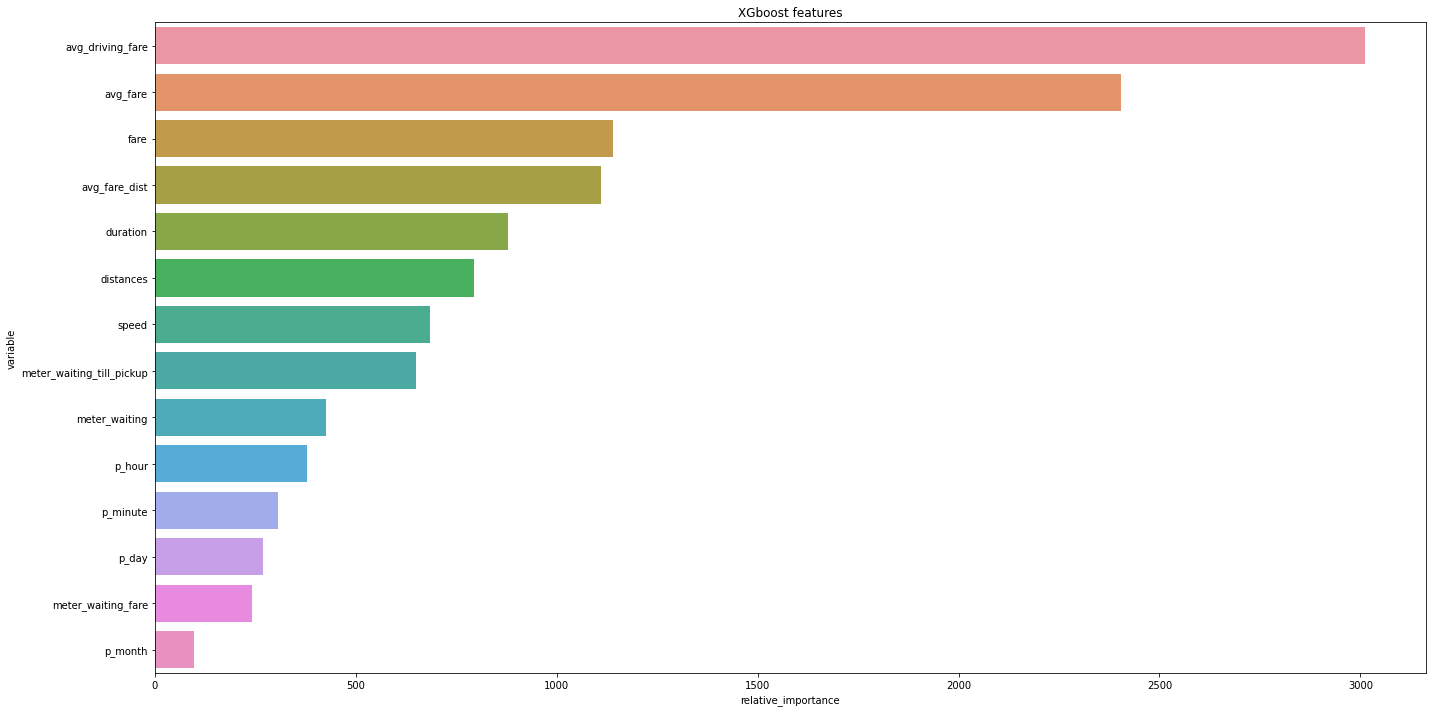

In [ ]:
feature_imp = m.varimp(use_pandas=True)
x_imp = feature_imp.head(40)


plt.figure(figsize=(20, 10))
sns.barplot(x="relative_importance", y="variable", data=x_imp.sort_values(by="relative_importance", ascending=False))
plt.title('XGboost features')
plt.tight_layout()
plt.show()

In [ ]:
pred_hf = h2o.H2OFrame(test)
predict = m.predict(pred_hf)
pf = h2o.as_list(predict)

submission['prediction'] = pf['predict']

submission.head(10)

Parse progress: |█████████████████████████████████████████████████████████| 100%
xgboost prediction progress: |████████████████████████████████████████████| 100%


,tripid,prediction
0,213284604,1
1,213286352,1
2,213293973,1
3,213294622,1
4,213298687,1
5,213299545,0
6,213302332,1
7,213302671,1
8,213305594,1
9,213305134,1


In [ ]:
submission.loc[submission['prediction'] == 0]

,tripid,prediction
5,213299545,0
13,213310068,0
30,213318535,0
39,213325248,0
40,213326731,0
...,...,...
8401,222716573,0
8406,222717033,0
8443,222735934,0
8532,222816520,0


In [ ]:
submission.to_csv(path + '/submission_110.csv',index=False)

##Combining different dataframes##

In [ ]:
s03 = pd.read_csv(path + '/submission_104.csv')
s03.loc[s03['prediction'] == 0]

,tripid,prediction
5,213299545,0
13,213310068,0
30,213318535,0
39,213325248,0
40,213326731,0
...,...,...
8401,222716573,0
8406,222717033,0
8443,222735934,0
8532,222816520,0


In [ ]:
s03 = pd.read_csv(path + '/submission_12.csv')

In [ ]:
s12.loc[s14['prediction'] == 0]

,tripid,prediction
5,213299545,0
13,213310068,0
30,213318535,0
39,213325248,0
40,213326731,0
...,...,...
8401,222716573,0
8406,222717033,0
8443,222735934,0
8532,222816520,0


In [ ]:
s01 = pd.read_csv(path + '/submission_8.csv')
s02 = pd.read_csv(path + '/submission_10.csv')
s03 = pd.read_csv(path + '/submission_12.csv')
s04 = pd.read_csv(path + '/submission_19.csv')
s05 = pd.read_csv(path + '/submission_43.csv')
s06 = pd.read_csv(path + '/submission_54.csv')
s07_1 = pd.read_csv(path + '/submission_72.csv')
s07 = pd.read_csv(path + '/submission_73.csv')
s08 = pd.read_csv(path + '/submission_52.csv')
s09 = pd.read_csv(path + '/submission_42.csv')
s10 = pd.read_csv(path + '/submission_93.csv')

In [ ]:
s11 = pd.read_csv(path + '/submission_20_x.csv')
s12 = pd.read_csv(path + '/sample_predition_88.csv')
s13 = pd.read_csv(path + '/ride_fare_submission_xgb_447z_more_base_0_1_depth_6_est_200.csv')
s14 = pd.read_csv(path + '/sample_predition_77 (1).csv')
s15 = pd.read_csv(path + '/sample_predition_88.csv')

In [ ]:
x = s03.loc[(s03['prediction'] != s04['prediction']) & (s03['prediction'] != s06['prediction'])  & (s03['prediction'] != s07['prediction']) & (s03['prediction'] != s11['prediction'])]

In [ ]:
s15.loc[s15['prediction'] != s12['prediction']]

,tripid,prediction


In [ ]:
x.shape

(30, 2)

In [ ]:
s03.loc[((s03['prediction'] != s04['prediction']) & (s03['prediction'] != s06['prediction'])  & (s03['prediction'] != s07['prediction']) & (s03['prediction'] != s11['prediction']) & (s03['prediction'] == 0)), 'prediction'] = 1
s03.loc[((s03['prediction'] != s04['prediction']) & (s03['prediction'] != s06['prediction'])  & (s03['prediction'] != s07['prediction']) & (s03['prediction'] != s11['prediction']) & (s03['prediction'] == 1)), 'prediction'] = 0

In [ ]:
s03.loc[(s03['prediction'] != s01['prediction']) & (s03['prediction'] != s02['prediction']) & (s03['prediction'] != s04['prediction']) & (s03['prediction'] != s05['prediction']) & (s03['prediction'] != s06['prediction']) & (s03['prediction'] != s07['prediction']) & (s03['prediction'] != s08['prediction']) & (s03['prediction'] != s09['prediction']) & (s03['prediction'] != s10['prediction']) & (s03['prediction'] != s11['prediction'])  & (s03['prediction'] == 0), 'prediction'] = 1
s03.loc[(s03['prediction'] != s01['prediction']) & (s03['prediction'] != s02['prediction']) & (s03['prediction'] != s04['prediction']) & (s03['prediction'] != s05['prediction']) & (s03['prediction'] != s06['prediction']) & (s03['prediction'] != s07['prediction']) & (s03['prediction'] != s08['prediction']) & (s03['prediction'] != s09['prediction']) & (s03['prediction'] != s10['prediction']) & (s03['prediction'] != s11['prediction'])  & (s03['prediction'] == 1), 'prediction'] = 0

In [ ]:
s03.loc[(s03['prediction'] != s01['prediction']) & (s03['prediction'] != s02['prediction']) & (s03['prediction'] != s04['prediction']) & (s03['prediction'] != s05['prediction']) & (s03['prediction'] != s06['prediction']) & (s03['prediction'] != s07['prediction']) & (s03['prediction'] != s08['prediction']) & (s03['prediction'] != s09['prediction']) & (s03['prediction'] != s10['prediction']) & (s03['prediction'] == 1), 'prediction'] = 0

In [ ]:
s03.to_csv(path + '/submission_113.csv',index=False)

In [ ]:
s96.loc[s96['prediction'] == 0]

,tripid,prediction
5,213299545,0
13,213310068,0
30,213318535,0
39,213325248,0
40,213326731,0
...,...,...
8401,222716573,0
8406,222717033,0
8443,222735934,0
8532,222816520,0


In [ ]:
s96 = pd.read_csv(path + '/submission_129.csv')

In [ ]:
s96.loc[1103]

tripid        214447036
prediction            0
Name: 1103, dtype: int64

In [ ]:
x = s11.loc[(s11['prediction'] != s12['prediction']) & (s03['prediction'] != s11['prediction'])]

In [ ]:
x.shape

(65, 2)

In [ ]:
s11.loc[((s11['prediction'] != s06['prediction'])  & (s11['prediction'] != s07['prediction']) & (s03['prediction'] != s11['prediction'])& (s11['prediction'] == 0)), 'prediction'] = 1
s11.loc[((s11['prediction'] != s06['prediction'])  & (s11['prediction'] != s07['prediction']) & (s03['prediction'] != s11['prediction'])& (s11['prediction'] == 1)), 'prediction'] = 0

In [ ]:
s96.loc[570, 'prediction'] = 1 
s96.loc[893, 'prediction'] = 1 
s96.loc[1465, 'prediction'] = 1 
s96.loc[3084, 'prediction'] = 1 
s96.loc[4688, 'prediction'] = 1 
s96.loc[5134, 'prediction'] = 1 
s96.loc[7097, 'prediction'] = 1 
s96.loc[7339, 'prediction'] = 1
s96.loc[1695, 'prediction'] = 0
s96.loc[1103, 'prediction'] = 0

In [ ]:
s96.to_csv(path + '/submission_119.csv',index=False)

In [ ]:
s12.loc[s12['prediction'] == 0]

,tripid,prediction
5,213299545,0
13,213310068,0
30,213318535,0
39,213325248,0
40,213326731,0
...,...,...
8401,222716573,0
8406,222717033,0
8443,222735934,0
8532,222816520,0


In [ ]:
x = s11.loc[(s11['prediction'] != s01['prediction']) & (s11['prediction'] != s02['prediction']) & (s11['prediction'] != s04['prediction']) & (s11['prediction'] != s05['prediction']) & (s11['prediction'] != s06['prediction']) & (s11['prediction'] != s07['prediction']) & (s11['prediction'] != s08['prediction']) & (s11['prediction'] != s09['prediction']) & (s11['prediction'] != s10['prediction']) & (s11['prediction'] != s03['prediction'])]

In [ ]:
s11.loc[(s11['prediction'] != s01['prediction']) & (s11['prediction'] != s02['prediction']) & (s11['prediction'] != s04['prediction']) & (s11['prediction'] != s05['prediction']) & (s11['prediction'] != s06['prediction']) & (s11['prediction'] != s07['prediction']) & (s11['prediction'] != s08['prediction']) & (s11['prediction'] != s09['prediction']) & (s11['prediction'] != s10['prediction']) & (s11['prediction'] != s03['prediction']) & (s11['prediction'] == 0), 'prediction'] = 1
s11.loc[(s11['prediction'] != s01['prediction']) & (s11['prediction'] != s02['prediction']) & (s11['prediction'] != s04['prediction']) & (s11['prediction'] != s05['prediction']) & (s11['prediction'] != s06['prediction']) & (s11['prediction'] != s07['prediction']) & (s11['prediction'] != s08['prediction']) & (s11['prediction'] != s09['prediction']) & (s11['prediction'] != s10['prediction']) & (s11['prediction'] != s03['prediction']) & (s11['prediction'] == 1), 'prediction'] = 0


In [ ]:
x = s11.loc[(s11['prediction'] != s07['prediction']) & (s11['prediction'] != s12['prediction']) & (s03['prediction'] != s11['prediction'])]

In [ ]:
x.shape

(43, 2)

In [ ]:
s11.loc[((s11['prediction'] != s07['prediction']) & (s11['prediction'] != s12['prediction']) & (s03['prediction'] != s11['prediction'])& (s11['prediction'] == 0)), 'prediction'] = 1
s11.loc[((s11['prediction'] != s07['prediction']) & (s11['prediction'] != s12['prediction']) & (s03['prediction'] != s11['prediction'])& (s11['prediction'] == 1)), 'prediction'] = 0

In [ ]:
s11.to_csv(path + '/submission_116.csv',index=False)

In [ ]:
x = s12.loc[(s12['prediction'] != s11['prediction']) & (s12['prediction'] != s13['prediction']) & (s03['prediction'] != s12['prediction'])]

In [ ]:
x.shape

(0, 2)

In [ ]:
s14.loc[((s14['prediction'] != s11['prediction']) & (s14['prediction'] != s13['prediction']) & (s03['prediction'] != s14['prediction'])& (s14['prediction'] == 0)), 'prediction'] = 1
s14.loc[((s14['prediction'] != s11['prediction']) & (s14['prediction'] != s13['prediction']) & (s03['prediction'] != s14['prediction'])& (s14['prediction'] == 1)), 'prediction'] = 0

In [ ]:
s12.loc[((s12['prediction'] != s11['prediction']) & (s12['prediction'] != s13['prediction']) & (s03['prediction'] != s12['prediction'])& (s12['prediction'] == 0)), 'prediction'] = 1
s12.loc[((s12['prediction'] != s11['prediction']) & (s12['prediction'] != s13['prediction']) & (s03['prediction'] != s12['prediction'])& (s12['prediction'] == 1)), 'prediction'] = 0

In [ ]:
s12.to_csv(path + '/submission_129.csv',index=False)

In [ ]:
s01 = pd.read_csv(path + '/submission_8.csv')
s02 = pd.read_csv(path + '/submission_10.csv')
s03 = pd.read_csv(path + '/submission_12.csv')
s04 = pd.read_csv(path + '/submission_19.csv')
s05 = pd.read_csv(path + '/submission_43.csv')

submission = pd.read_csv(path + '/sample_submission.csv')


In [ ]:
submission['prediction'] = (s01['prediction'] + s02['prediction'] + s03['prediction'] + s04['prediction'] + s05['prediction'])/5

submission.loc[(submission['prediction'] > 0.5), 'prediction'] = 1        
submission.loc[(submission['prediction'] <= 0.5), 'prediction'] = 0                                                                                                                                                      

In [ ]:
submission['prediction'] = submission['prediction'].astype(int)

In [ ]:
submission.head()

,tripid,prediction
0,213284604,1
1,213286352,1
2,213293973,1
3,213294622,1
4,213298687,1
